### Draft 1 - Travel Model
10/22/2024

In [1]:
# load all required libraries (aka packages)
using Plots
using LinearAlgebra
using LaTeXStrings
using Roots

First let's practice some diff eqs in Julia

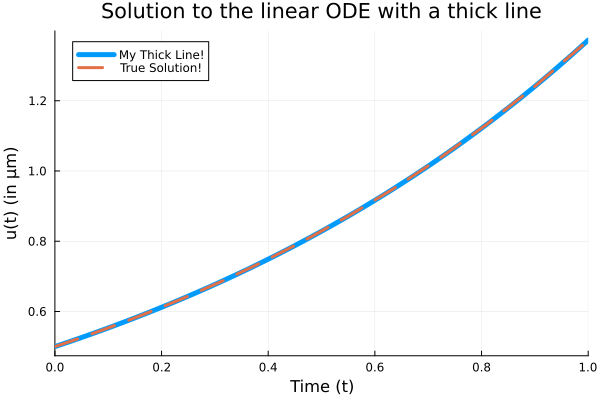

In [3]:
using DifferentialEquations
f(u, p, t) = 1.01 * u
u0 = 1 / 2
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

using Plots
plot(sol, linewidth = 5, title = "Solution to the linear ODE with a thick line",
    xaxis = "Time (t)", yaxis = "u(t) (in μm)", label = "My Thick Line!") # legend=false
plot!(sol.t, t -> 0.5 * exp(1.01t), lw = 3, ls = :dash, label = "True Solution!")

Practice system of equations: Lorenz equations

In [ ]:
function lorenz!(du, u, p, t)
    du[1] = 10.0 * (u[2] - u[1])
    du[2] = u[1] * (28.0 - u[3]) - u[2]
    du[3] = u[1] * u[2] - (8 / 3) * u[3]
end

In [ ]:
using DifferentialEquations
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob)

using Plots
plot(sol, idxs = (1, 2, 3))

Lorenz equations but parameterized

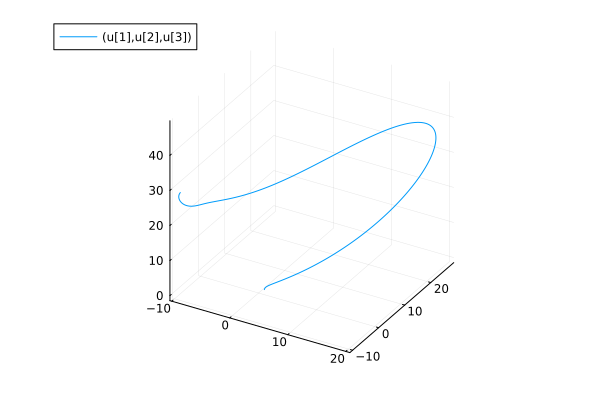

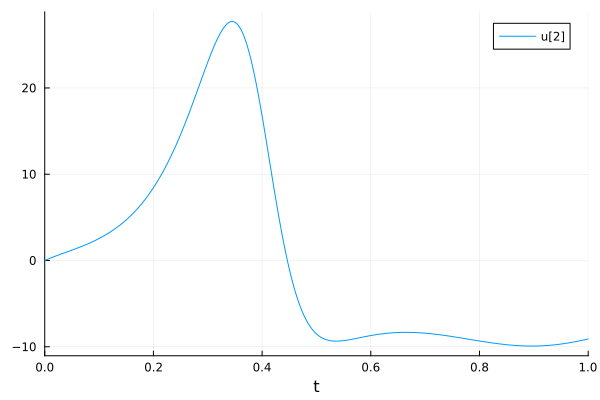

In [10]:
function parameterized_lorenz!(du, u, p, t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

using DifferentialEquations
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 1.0)
p = [10.0, 28.0, 8 / 3]
prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
sol = solve(prob)

using Plots
plt1 = plot(sol, idxs = (1, 2, 3))
plt2 = plot(sol, idxs = (0, 2))

display(plt1)
display(plt2)

Example: parameterized Lorenz (same as above but prettier)

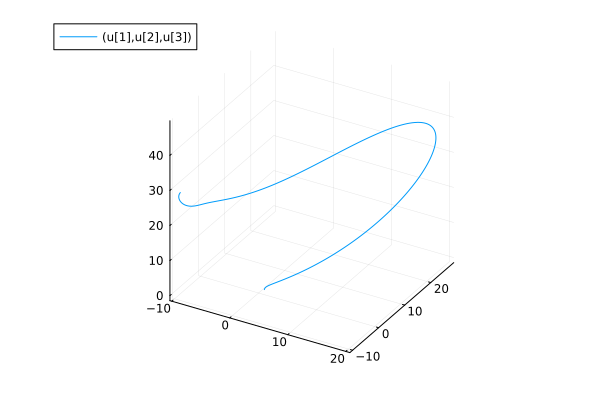

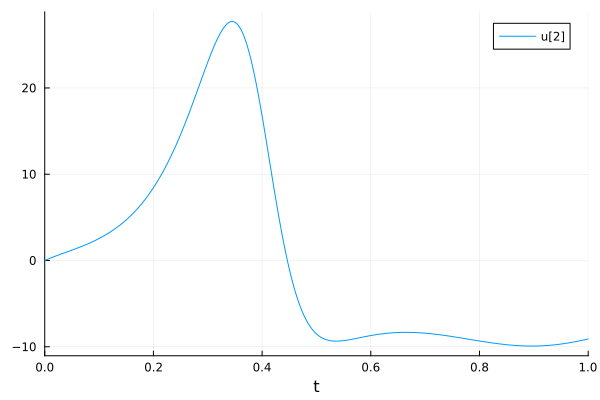

In [9]:
function parameterized_lorenz!(du, u, p, t)
    x, y, z = u
    σ, ρ, β = p
    du[1] = dx = σ * (y - x)
    du[2] = dy = x * (ρ - z) - y
    du[3] = dz = x * y - β * z
end

using DifferentialEquations
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 1.0)
p = [10.0, 28.0, 8 / 3]
prob = ODEProblem(parameterized_lorenz!, u0, tspan, p)
sol = solve(prob)

using Plots
plt1 = plot(sol, idxs = (1, 2, 3))

plt2 = plot(sol, idxs = (0, 2))

display(plt1)
display(plt2)

Example: non-homogeneous ODEs

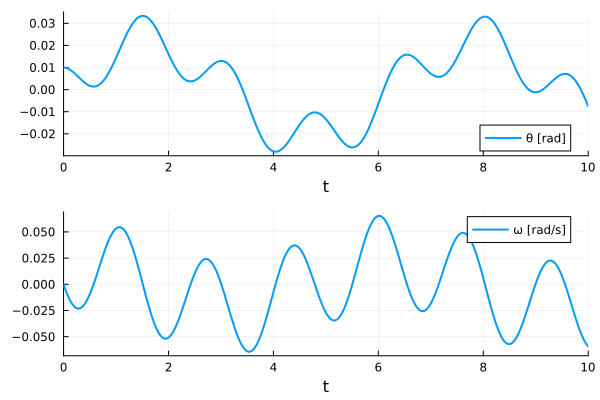

In [11]:
using DifferentialEquations
using Plots

l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du, u, p, t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g / (2l) * sin(u[1]) + 3 / (m * l^2) * p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0, 10.0)                  # time interval

M = t -> 0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!, u₀, tspan, M)
sol = solve(prob)

plot(sol, linewidth = 2, xaxis = "t", label = ["θ [rad]" "ω [rad/s]"], layout = (2, 1))

Example: simple competition model

In [ ]:
# Simple competition model
function pred!(dN, N, a, t)
    dN[1] = N[1]*(1-a[1]*N[1] - a[2]*N[2])
    dN[2] = N[2]*(1-a[3]*N[1] - a[4]*N[2])
end

# Choose parameters
a11=2; a12=0.5; a21=1; a22=1 # later try passing these
a = [a11; a12; a21; a22]

# Solve diff eq
using DifferentialEquations
N0 = [1.0; 0.2]
tspan = (0.0, 100.0)
prob = ODEProblem(pred!, N0, tspan, a)
sol = solve(prob)
using Plots
#plot(sol, idxs = (0, 1, 2))
plot(sol, idxs = (0,1), label="N1")
plot!(sol, idxs = (0,2), label="N2")